In [1]:
# Import our dependencies.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
# Import the kerastuner library
import keras_tuner as kt


In [2]:
#  Import and read the datasets.csv
import pandas as pd 
crime_df = pd.read_csv("../cleaned_data_2015_2018/temp_all_data_merged_cleaned_2015_2018.csv")
crime_df.head()

,event_unique_id,crime,occ_year,occ_month,occ_day,occ_dow,occ_hour,premises_type,hood_140,neighbourhood_140,long_wgs84,lat_wgs84,date,crime_num
0,GO-20155154,assault,2015,January,1,Thursday,23,House,115,Mount Dennis (115),-79.504668,43.693238,2015-01-01,1
1,GO-20151233,assault,2015,January,1,Thursday,3,Commercial,77,Waterfront Communities-The Island (77),-79.392855,43.647315,2015-01-01,1
2,GO-2015862,assault,2015,January,1,Thursday,2,Commercial,77,Waterfront Communities-The Island (77),-79.387700,43.649776,2015-01-01,1
3,GO-2015182,assault,2015,January,1,Thursday,0,Commercial,1,West Humber-Clairville (1),-79.595562,43.686751,2015-01-01,1
4,GO-2015276,assault,2015,January,1,Thursday,0,Outside,77,Waterfront Communities-The Island (77),-79.400096,43.645835,2015-01-01,1


In [3]:
#  Import and read the datasets.csv
import pandas as pd 
weather_df = pd.read_csv("../cleaned_data_2015_2018/toronto_daily_weather_2015_2018.csv")
weather_df.head()

,date,max_temperature,min_temperature,max_relative_humidity,avg_relative_humidity,avg_pressure_sea,max_wind_speed,precipitation,rain,snow,snow_on_ground,daylight,avg_cloud_cover_8
0,2018-12-31,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,0.0,8.98,4.5
1,2018-12-30,0.7,-6.6,88,78.0,102.03,24,1.2,0.0,1.6,2.0,8.97,5.0
2,2018-12-29,2.7,-7.0,80,68.0,101.86,34,0.0,0.0,0.0,0.0,8.95,4.5
3,2018-12-28,12.4,2.7,95,84.5,100.89,30,1.8,1.8,0.0,0.0,8.93,4.5
4,2018-12-27,2.8,-7.4,87,74.0,102.52,30,5.4,5.4,0.0,0.0,8.93,4.0


In [4]:
# Drop the non-beneficial ID columns, from crime data
# For optimization remove only 'EIN' and 'STATUS', keep 'NAME'
crime_df.drop(columns=['event_unique_id','occ_year', 'occ_month', 'occ_day', 'occ_dow', 'occ_hour', 'neighbourhood_140', 'long_wgs84', 'lat_wgs84' ], inplace=True)
crime_df.head()

,crime,premises_type,hood_140,date,crime_num
0,assault,House,115,2015-01-01,1
1,assault,Commercial,77,2015-01-01,1
2,assault,Commercial,77,2015-01-01,1
3,assault,Commercial,1,2015-01-01,1
4,assault,Outside,77,2015-01-01,1


In [5]:
# Drop the non-beneficial ID columns, from weather
# For optimization remove only 'EIN' and 'STATUS', keep 'NAME'
weather_df.drop(columns=['max_relative_humidity', 'rain', 'snow'], inplace=True)
weather_df.head()

,date,max_temperature,min_temperature,avg_relative_humidity,avg_pressure_sea,max_wind_speed,precipitation,snow_on_ground,daylight,avg_cloud_cover_8
0,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0.0,8.98,4.5
1,2018-12-30,0.7,-6.6,78.0,102.03,24,1.2,2.0,8.97,5.0
2,2018-12-29,2.7,-7.0,68.0,101.86,34,0.0,0.0,8.95,4.5
3,2018-12-28,12.4,2.7,84.5,100.89,30,1.8,0.0,8.93,4.5
4,2018-12-27,2.8,-7.4,74.0,102.52,30,5.4,0.0,8.93,4.0


In [6]:
# Merge weather and crime dataframes
alldata_df = pd.merge(weather_df, crime_df, on="date", how="left")

alldata_df.head()

,date,max_temperature,min_temperature,avg_relative_humidity,avg_pressure_sea,max_wind_speed,precipitation,snow_on_ground,daylight,avg_cloud_cover_8,crime,premises_type,hood_140,crime_num
0,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0.0,8.98,4.5,assault,Apartment,2,1
1,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0.0,8.98,4.5,assault,House,127,1
2,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0.0,8.98,4.5,assault,Outside,28,1
3,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0.0,8.98,4.5,assault,House,112,1
4,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0.0,8.98,4.5,assault,Outside,25,1


#### PreProcessing


In [7]:
# Determine the number of unique values in each column.
unique =alldata_df.nunique()
unique

date                     1461
max_temperature           434
min_temperature           409
avg_relative_humidity     120
avg_pressure_sea          323
max_wind_speed             52
precipitation             112
snow_on_ground             22
daylight                  383
avg_cloud_cover_8          16
crime                       9
premises_type               7
hood_140                  141
crime_num                   1
dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
hood_counts =alldata_df.hood_140.value_counts()
hood_counts

77     6825
75     5742
76     4950
78     4510
1      4425
       ... 
109     364
60      357
97      299
29      292
114     243
Name: hood_140, Length: 141, dtype: int64

<AxesSubplot:ylabel='Density'>

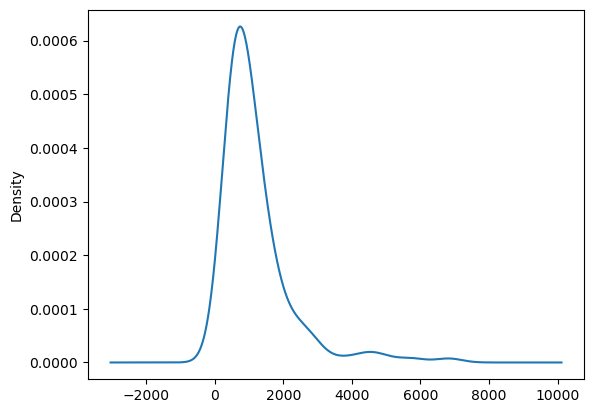

In [9]:
# Visualize the value counts of APPLICATION_TYPE
hood_counts.plot.density()

In [12]:
# Determine which values to replace if counts are less than ...?
replace_hood = list(hood_counts[hood_counts < 300].index)

# Replace in dataframe
for app in replace_hood:
    alldata_df.hood_140 = alldata_df.hood_140.replace(app,"Other")
    
# Check to make sure binning was successful
alldata_df.hood_140.value_counts()

Other    35711
77        6825
75        5742
76        4950
78        4510
         ...  
30         876
35         869
61         851
33         828
135        811
Name: hood_140, Length: 77, dtype: int64

In [14]:
# Generate our categorical variable lists
data_cat = alldata_df.dtypes[alldata_df.dtypes == "object"].index.tolist()

data_cat

data_cat = ['crime', 'premises_type', 'hood_140']

data_cat

['crime', 'premises_type', 'hood_140']

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(alldata_df[data_cat])) 

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(data_cat)
encode_df.head()

c:\Users\User\anaconda3\envs\mleng\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,crime_assault,crime_auto_theft,crime_bicycle_theft,crime_break_and_enter,crime_homicide,crime_robbery,crime_shooting,crime_theft_from_motor_vehicle,crime_theft_over,premises_type_Apartment,...,hood_140_85,hood_140_86,hood_140_87,hood_140_88,hood_140_90,hood_140_93,hood_140_95,hood_140_98,hood_140_NSA,hood_140_Other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Merge one-hot encoded features and drop the originals
alldata_df = alldata_df.merge(encode_df,left_index=True, right_index=True)
alldata_df = alldata_df.drop(data_cat,1)
alldata_df.head()

c:\Users\User\anaconda3\envs\mleng\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,date,max_temperature,min_temperature,avg_relative_humidity,avg_pressure_sea,max_wind_speed,precipitation,snow_on_ground,daylight,avg_cloud_cover_8,...,hood_140_85,hood_140_86,hood_140_87,hood_140_88,hood_140_90,hood_140_93,hood_140_95,hood_140_98,hood_140_NSA,hood_140_Other
0,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0.0,8.98,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0.0,8.98,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0.0,8.98,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0.0,8.98,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2018-12-31,5.0,-2.5,79.5,100.78,21,13.6,0.0,8.98,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#TODO 
# Group by date, sum of crimes per day
# Maybe put in a weight factor for more serious crimes

In [17]:
# Drop data column
alldata_df.drop(columns=['date'], inplace=True)

alldata_df.head()

,max_temperature,min_temperature,avg_relative_humidity,avg_pressure_sea,max_wind_speed,precipitation,snow_on_ground,daylight,avg_cloud_cover_8,crime_num,...,hood_140_85,hood_140_86,hood_140_87,hood_140_88,hood_140_90,hood_140_93,hood_140_95,hood_140_98,hood_140_NSA,hood_140_Other
0,5.0,-2.5,79.5,100.78,21,13.6,0.0,8.98,4.5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,-2.5,79.5,100.78,21,13.6,0.0,8.98,4.5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,-2.5,79.5,100.78,21,13.6,0.0,8.98,4.5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5.0,-2.5,79.5,100.78,21,13.6,0.0,8.98,4.5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,-2.5,79.5,100.78,21,13.6,0.0,8.98,4.5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Split our preprocessed data into our features and target arrays
#TODO - need column for target
y = alldata_df["crime_num"].values
X = alldata_df.drop(["crime_num"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

c:\Users\User\anaconda3\envs\mleng\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Verify X_Train
X_train_scaled

array([[ 0.96988726,  0.96789387, -1.77368487, ..., -0.08595931,
        -0.12174579, -0.52244585],
       [ 0.67494623,  0.94833413,  0.32248082, ..., -0.08595931,
        -0.12174579, -0.52244585],
       [ 0.22385993, -0.20569023, -1.90748268, ..., -0.08595931,
        -0.12174579, -0.52244585],
       ...,
       [ 1.67254091,  1.61336512, -2.08587976, ..., -0.08595931,
        -0.12174579,  1.91407396],
       [ 0.86579043,  1.13415161,  0.5008779 , ..., -0.08595931,
        -0.12174579,  1.91407396],
       [ 1.10868305,  0.88965493, -1.55068852, ..., -0.08595931,
        -0.12174579, -0.52244585]])

#### Build single model

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_model = tf.keras.models.Sequential()

number_input_features = len(X_train[0])
hidden_nodes_layer1 = 200
#hidden_nodes_layer2 = 1200

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
#nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 200)               20800     
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 21,001
Trainable params: 21,001
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
3903/3903 [==============================] - 8s 2ms/step - loss: 0.0017 - accuracy: 0.9999
Epoch 2/100
3903/3903 [==============================] - 6s 2ms/step - loss: 2.8482e-06 - accuracy: 1.0000
Epoch 3/100
3903/3903 [==============================] - 6s 2ms/step - loss: 2.9962e-07 - accuracy: 1.0000
Epoch 4/100
3903/3903 [==============================] - 6s 2ms/step - loss: 4.1384e-08 - accuracy: 1.0000
Epoch 5/100
3903/3903 [==============================] - 7s 2ms/step - loss: 1.3163e-08 - accuracy: 1.0000
Epoch 6/100
3903/3903 [==============================] - 6s 2ms/step - loss: 8.1333e-09 - accuracy: 1.0000
Epoch 7/100
3903/3903 [==============================] - 6s 2ms/step - loss: 5.9652e-09 - accuracy: 1.0000
Epoch 8/100
3903/3903 [==============================] - 6s 2ms/step - loss: 5.0144e-09 - accuracy: 1.0000
Epoch 9/100
3903/3903 [==============================] - 6s 2ms/step - loss: 4.5014e-09 - accuracy: 1.0000
Epoch 10/100
3903/3903 [=================

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1301/1301 - 2s - loss: 2.9908e-09 - accuracy: 1.0000 - 2s/epoch - 1ms/step
Loss: 2.9907520904259854e-09, Accuracy: 1.0


In [28]:
# Save Model  
nn_model.save("Crime_singleLayer.h5")